In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    
    return centroids

In [77]:
def find_closest_centroids(X, centroids):
    """
    X is an ndarray of shape (num_of_points, 2)
    centroids is an ndarray of shape (num_of_points, 2)
    """
    K = centroids.shape[0]
    idx=np.zeros(X.shape[0], dtype=int)
    for point_index in range(X.shape[0]):
        prev_distance = np.linalg.norm(X[point_index] - centroids[0])
        for cent_index in range(K - 1):
            new_distance = np.linalg.norm(X[point_index] - centroids[cent_index+1])
            if new_distance < prev_distance:
                idx[point_index] = cent_index+1
                prev_distance = new_distance
    
    return idx

In [80]:
#unit test find_closest_centroids
X = np.array([[1,5], [1,7], [3, 5], [3, 7]])
centroids = np.array([[2,6], [10,0]])
idx = find_closest_centroids(X, centroids)
np.testing.assert_array_equal(idx, np.zeros(X.shape[0], dtype=int))

centroids = np.array([[10,0], [2,6]])
idx = find_closest_centroids(X, centroids)
np.testing.assert_array_equal(idx, np.ones(X.shape[0], dtype=int))

In [112]:
def compute_centroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    for cent_index in range(K):
        if(X[idx==cent_index].shape[0] > 0):
            new_centroid = np.sum(X[idx==cent_index], axis = 0) / X[idx==cent_index].shape[0]
            centroids[cent_index] = new_centroid
        else:
            centroids = np.delete(centroids, cent_index, axis = 0)
    
    return centroids

In [113]:
#unit test compute_centroids
X = np.array([[1,5], [1,7], [3, 5], [3, 7]])
K = 2
idx = np.zeros(X.shape[0], dtype=int)
compute_centroids(X, idx, K)

array([[2., 6.]])

In [81]:
def plot_points(X):
    """
    X is an ndarray of shape (num_of_points, 2)
    """
    x_coord = [i[0] for i in X]
    y_coord = [i[1] for i in X]
    plt.scatter(x_coord, y_coord)

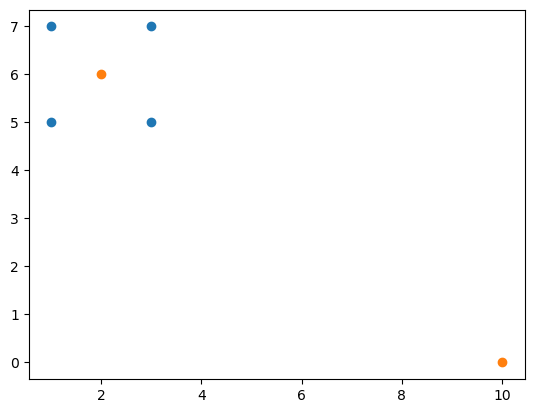

In [82]:
plot_points(X)
plot_points(centroids)